# Decision Tree
A machine learning algorithm based on SL, that can be used for both regression and classification problems. The goal is to bvuild up a classifier model that can predict the class or value of the target variable.

Root node split into--> Decision node -->Leafnode

**Uses of decion tree in real life**
In medical, to make decision about the disease, if he has fevcer or not, he has covid or not? etc
Basically makin  g decisoon in yes or no

In [2]:
import pandas as pd

In [3]:
pwd

'C:\\Users\\sujat\\OneDrive\\Desktop\\ML'

In [4]:
data = pd.read_csv("PlayTennis.csv")
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()

In [7]:
data = data[['outlook', 'temp','humidity', 'windy','play']].apply(label_encoder.fit_transform)
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [8]:
features_cols = ['outlook', 'temp','humidity', 'windy']
X = data[features_cols]
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [9]:
target = ['play']
y = data[target]
y

,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.20, random_state = 42)

In [12]:
X_train

,outlook,temp,humidity,windy
12,0,1,1,0
5,1,0,1,1
8,2,0,1,0
2,0,1,0,0
1,2,1,0,1
13,1,2,0,1
4,1,0,1,0
7,2,2,0,0
10,2,2,1,1
3,1,2,0,0


In [13]:
y_train

,play
12,1
5,0
8,1
2,1
1,0
13,0
4,1
7,0
10,1
3,1


In [14]:
y_test

,play
9,1
11,1
0,0


In [15]:
X_test

,outlook,temp,humidity,windy
9,1,2,1,0
11,0,2,0,1
0,2,1,0,0


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# classifier = DecisionTreeClassifier(criterion = 'gini')  #by default to check impurity of data which helps to split 
classifier = DecisionTreeClassifier(criterion = 'entropy') #model performace is not change in any of the criterion

In [18]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
classifier.predict(X_test)

array([1, 1, 0])

In [20]:
X_test # 0--> No, 1-->yes    outlook[Sunny-->2, overcast-->0, rainy-->1]

,outlook,temp,humidity,windy
9,1,2,1,0
11,0,2,0,1
0,2,1,0,0


In [21]:
classifier.score(X_test, y_test)

1.0

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.45, 0.8, '  False'),
 Text(0.3, 0.5, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7, 0.5, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

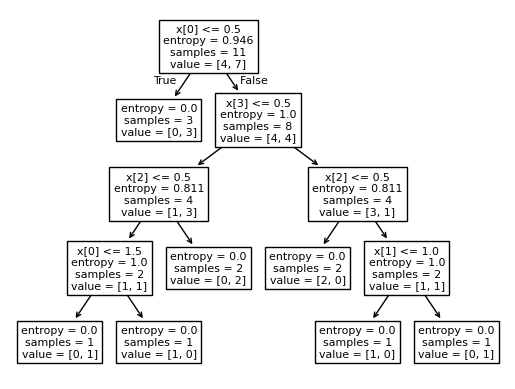

In [22]:
from sklearn import tree
tree.plot_tree(classifier)